In [1]:
from PIL import Image
from PIL.ExifTags import TAGS

import os
import cv2
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
parent = r"J:\BIGdatasets\HLH Transect Photos-20250522T000805Z-1-002\HLH Transect Photos\Urban Wildlife 2021-Jul Camera Trap Photos"

In [3]:
#TODO: turn into function that renames all images in all folders/subfolders with "{date}_{time}_{type}" or some other scheme to extract date/time info from already-sorted images.

count = 0
for root, dirs, files in os.walk(parent):

    for name in files:

        if (count > 3):

            break

        filePath = os.path.join(root, name)
        print(filePath)

        image = cv2.imread(filePath)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()

        image_data = Image.open(filePath)
        exifdata = image_data.getexif()
        print(exifdata.get(306))

        count += 1

In [34]:
subpath = r"E:\Big Datasets\HLH"

total = sum(len(files) for subdir, dirs, files in os.walk(subpath))
print(total)

sitenames = []

for subdir, dirs, files in os.walk(subpath):

    for file in files:

        filepath = os.path.join(subdir, file)

        dirname = os.path.dirname(filepath)

        basename = os.path.basename(dirname)

        basename = basename.replace('-',' ')
        basename = basename.replace('_', ' ')
        
        sitename = (basename.split())[0]

        if (not sitenames.__contains__(sitename)):

            sitenames.append(sitename)

        #print(basename)
        #print(filepath)
        #print(sitename)

print(sitenames)
        

32833
['CCSW1', 'CCSW', 'CHMP', 'CULP', 'FONP', 'GCGC', 'GLWC', 'Gpt141', 'GVP', 'GWGC', 'HANC', 'LGRP', 'MOCC', 'SCRNT', 'ROSP', 'SOPC', 'SPTP', 'UHBW', 'UHERP', 'UHSP', 'WCJP', 'BELP', 'FHNA', 'HUNP', 'GPT141', 'JROP', 'MGP', 'SWDP', 'PLMP', 'HCEM', 'Gpt', 'BSEC', 'HBP', 'HPGC', 'TESTING']


In [5]:
sorted_parent = r"J:\BIGdatasets\Sorted Pics"

labels = []
values = []

for root, dirs, files in os.walk(sorted_parent):

    labels.append(root)
    values.append(len(files))


for i, x in enumerate(labels):

    labels[i] = labels[i][27:]

labels.remove('')
values.remove(values[0])

#values as of 7/16/2025
values = [8, 1, 1, 1, 2, 13, 57, 42, 85, 7, 30, 11]

plt.figure(figsize=(18, 6))
plt.bar(labels, values, width = 0.8)

for i in range(len(labels)):

    plt.text(i, values[i], values[i])
    
plt.title("Counts of Respective Animal Labels")

ValueError: list.remove(x): x not in list

Text(0.5, 1.0, 'Counts of Respective Animal Labels')

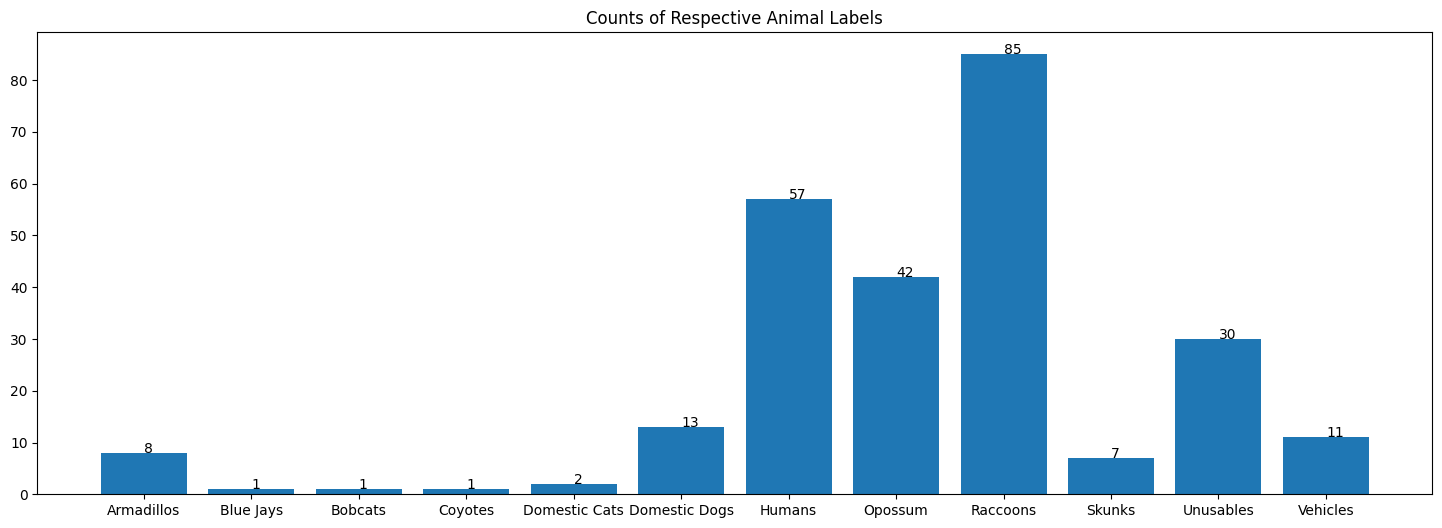

In [ ]:
labels = []
values = []

for root, dirs, files in os.walk(sorted_parent):

    labels.append(root)
    values.append(len(files))


for i, x in enumerate(labels):

    labels[i] = labels[i][27:]


labels.remove('')
values.remove(values[0])

plt.figure(figsize=(18, 6))
plt.bar(labels, values, width = 0.8)

for i in range(len(labels)):

    plt.text(i, values[i], values[i])
    
plt.title("Counts of Respective Animal Labels")